# Pymaceuticals Inc.
---

### Analysis


•	After looking at the Summary stats, it can be inferred that Capomulin and Ramicane drug rugimens are performing similarly which has better performance and most effectiveness in decreasing the tumour volume on the mouse, however Ramicane drug rugimen has the lowest final tumour volume and median value when looking at the box plots, which could be potentially best drug regimen, this needs to be analysed further to know the differences in tumour volumes from start and end of the analysis.

Bar Chart: showing both Capomulin and Ramicane are performing similar on the tumour volumes over the timepoint.

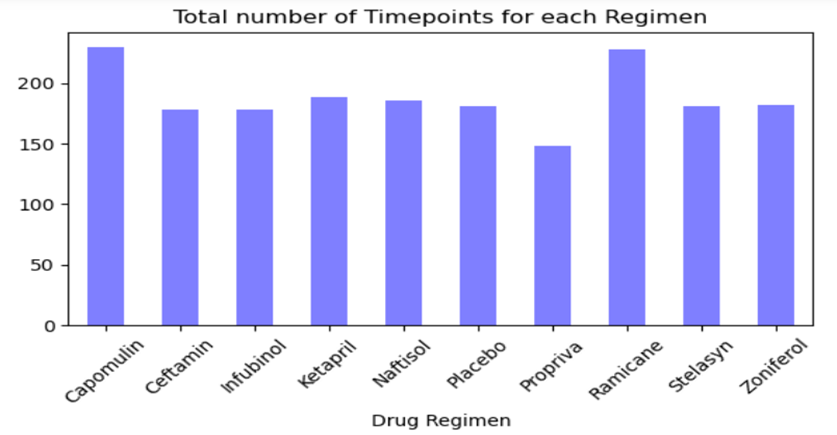
              
Boxplot: Ramicane drug regimen is having less median compared to Capomulin drug
 
  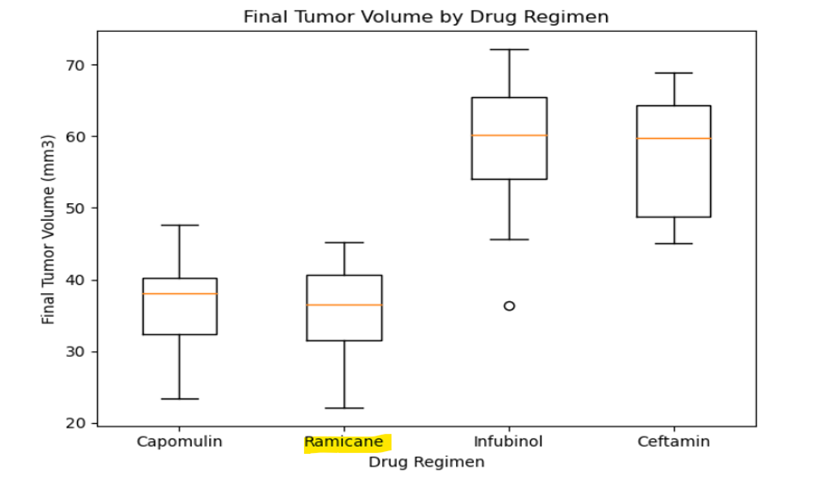

•	Adding to the above, Capomulin drug rugimen showed better results in reducing the tumour volume on the mouse over the full course of the study, potentially Capomulin drug is more effective on tumour treatments.

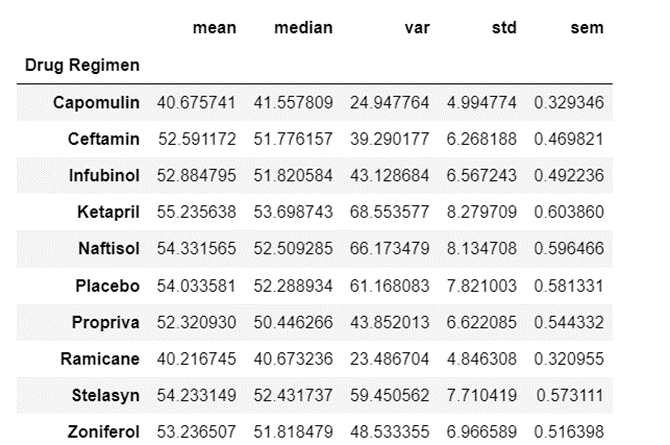
 

•	Also, there is a positive correlation of 0.84 across mouse's weight and the tumour volume, which can be seen in the linear regression as well.

Line equation: with regression values showing positive correlation of 0.84.
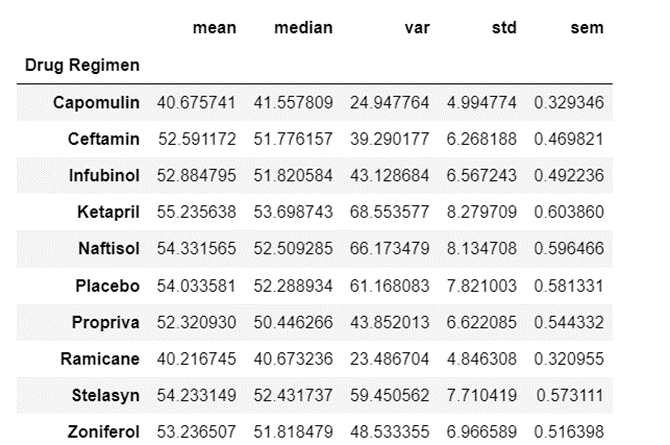
 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df= pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(merged_df["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
time_point_count=merged_df["Timepoint"].value_counts()
mouse_id_count=merged_df['Mouse ID'].value_counts()
mouse_id_count=mouse_id_count.reset_index()
# duplicate_mice
dup_mice_data=mouse_id_count.loc[mouse_id_count['count']>len(time_point_count)]
dup_mice_id = dup_mice_data['Mouse ID'][0]
dup_mice_id

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_mouse_id.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.loc[merged_df['Mouse ID']!=dup_mice_id]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
final_mice_count=len(cleaned_df["Mouse ID"].unique())
final_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_stats_df = cleaned_df.groupby(['Drug Regimen'])

#mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = summary_stats_df['Tumor Volume (mm3)'].mean()
tumor_volume_median = summary_stats_df['Tumor Volume (mm3)'].median()
tumor_volume_var = summary_stats_df['Tumor Volume (mm3)'].var()
tumor_volume_std = summary_stats_df['Tumor Volume (mm3)'].std()
tumor_volume_sem = summary_stats_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumour_stats_summary_df = pd.DataFrame({'Mean': tumor_volume_mean, 'Median': tumor_volume_median, 'Variance': tumor_volume_var, 'Standard Deviation': tumor_volume_std, 'SEM': tumor_volume_sem})
tumour_stats_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_stats_df = cleaned_df.groupby (['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

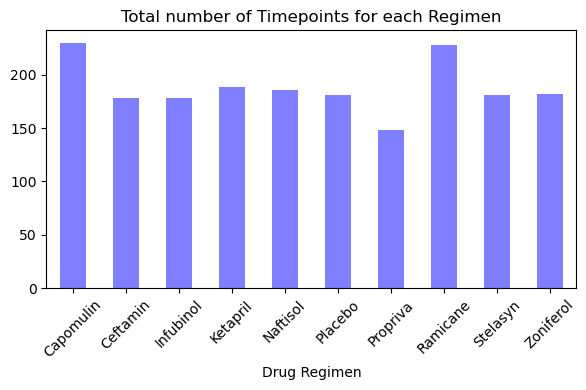

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_timepoint_df = cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count()
drug_timepoint_df.sort_values(ascending=False)
drug_timepoint_df.plot(kind="bar", figsize=(6,4),title="Total number of Timepoints for each Regimen",color='b', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


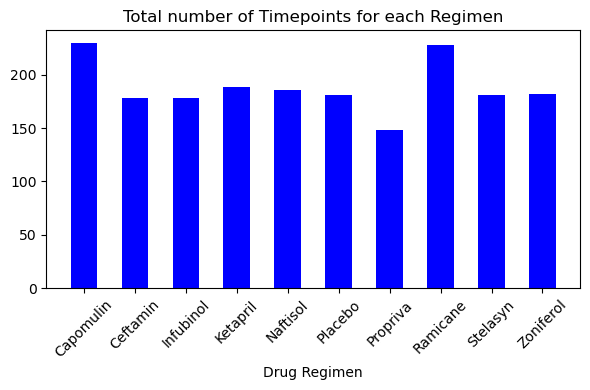

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_timepoint_count= cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count()

x_axis = np.arange(len(drug_timepoint_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.bar(x_axis, drug_timepoint_count, color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_timepoint_count.index), rotation=45)

plt.title("Total number of Timepoints for each Regimen")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()

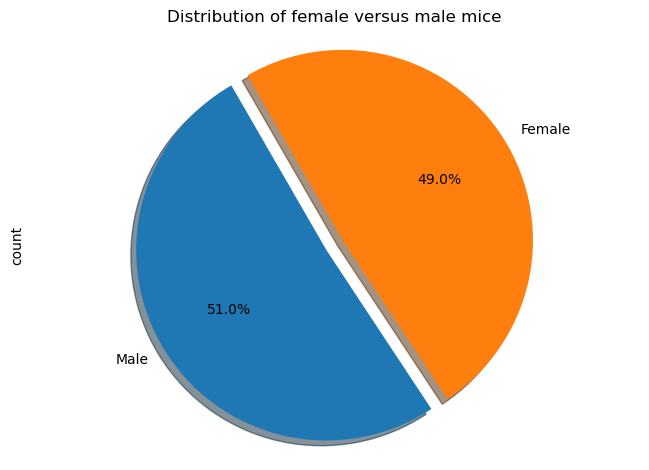

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count =cleaned_df['Sex'].value_counts()
explode = [0.1,0]
gender_count.plot(kind='pie',autopct='%1.1f%%',title='Distribution of female versus male mice',explode=explode,startangle=120, shadow=True)
plt.tight_layout()
plt.axis("equal")
plt.show()

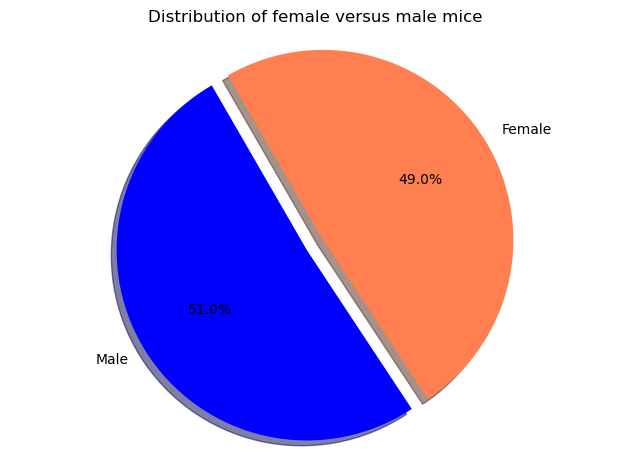

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count
sizes = gender_count.reset_index().iloc[:,1]
labels =  gender_count.reset_index().iloc[:,0]

# The colours of each section of the pie chart
colors = ["blue", "coral"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%",explode=explode,startangle=120,shadow=True)
plt.title('Distribution of female versus male mice')
plt.tight_layout()
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens  = ['Capomulin','Ramicane','Infubinol','Ceftamin']
reduced_drug_df = cleaned_df[cleaned_df["Drug Regimen"].isin(drug_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
group_by_mouse_ID = reduced_drug_df.groupby("Mouse ID")
greatest_timepoint = group_by_mouse_ID['Timepoint'].max()
greatest_timepoint = greatest_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint_volume =  pd.merge(greatest_timepoint,cleaned_df, on=["Mouse ID","Timepoint"], how="left")
greatest_timepoint_volume.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_regimens:
    tumor_by_drug = greatest_timepoint_volume.loc[greatest_timepoint_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset
    tumor_volumes.append(tumor_by_drug)    


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index,treatment in enumerate(tumor_volumes):
    treatment_name = drug_regimens[index]

    quartiles = treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"-------------------------------------------------------------")
    print(f"                {treatment_name}                             ")
    print(f"The lower quartile of {treatment_name} is: {round(lowerq,2)}.")
    print(f"The upper quartile of {treatment_name} is: {round(upperq,2)}.")
    print(f"The interquartile range of {treatment_name} is: {round(iqr,2)}.")
    print(f"The median of {treatment_name} is: {round(quartiles[0.5],2)}.") 

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers for {treatment_name}.")
    print(f"Values above {round(upper_bound,2)} could be outliers for {treatment_name}.")
    outliers = (greatest_timepoint_volume.loc[(greatest_timepoint_volume["Drug Regimen"] == treatment_name) & ((greatest_timepoint_volume["Tumor Volume (mm3)"] < lower_bound) | (greatest_timepoint_volume["Tumor Volume (mm3)"] > upper_bound))])
    outliers_no = len(outliers)
    print(f"The number of outliers for {treatment_name} is: {outliers_no}.")
    if outliers_no > 0:
        outlier_list = outliers["Mouse ID"].to_numpy()
        print(f"The outliers are: {outlier_list}.")
    print("")
print(f"-------------------------------------------------------------")    

-------------------------------------------------------------
                Capomulin                             
The lower quartile of Capomulin is: 32.38.
The upper quartile of Capomulin is: 40.16.
The interquartile range of Capomulin is: 7.78.
The median of Capomulin is: 38.13.
Values below 20.7 could be outliers for Capomulin.
Values above 51.83 could be outliers for Capomulin.
The number of outliers for Capomulin is: 0.

-------------------------------------------------------------
                Ramicane                             
The lower quartile of Ramicane is: 31.56.
The upper quartile of Ramicane is: 40.66.
The interquartile range of Ramicane is: 9.1.
The median of Ramicane is: 36.56.
Values below 17.91 could be outliers for Ramicane.
Values above 54.31 could be outliers for Ramicane.
The number of outliers for Ramicane is: 0.

-------------------------------------------------------------
                Infubinol                             
The lower quartile of Inf

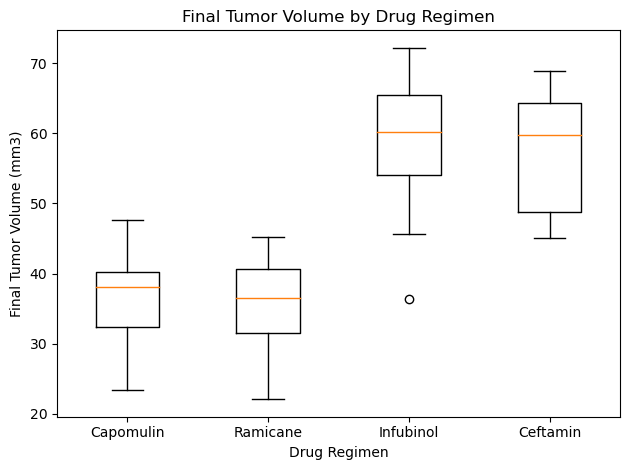

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tick_locations = [1,2,3,4]
plt.boxplot(tumor_volumes)
plt.xticks(tick_locations,drug_regimens)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume by Drug Regimen")
plt.tight_layout()
plt.show()


## Line and Scatter Plots

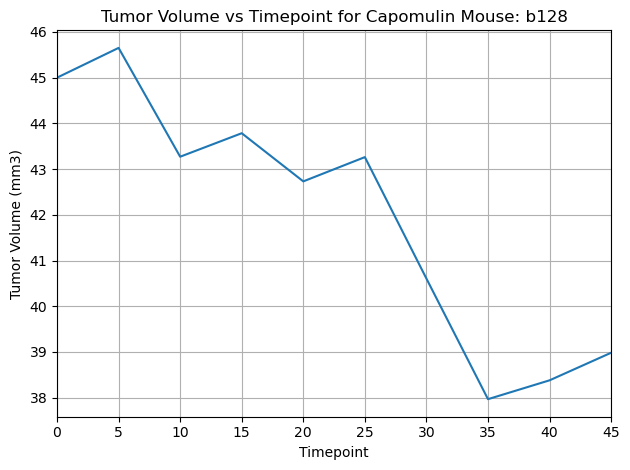

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_treated=cleaned_df.set_index('Drug Regimen').loc['Capomulin',:].sort_values(['Mouse ID','Timepoint'])

single_mouse=capomulin_treated.iloc[0,0]

Capomulin_mouse_df = cleaned_df.loc[cleaned_df["Mouse ID"] == single_mouse]

Capomulin_timepoint = Capomulin_mouse_df["Timepoint"]
Capomulin_tumour_volume = Capomulin_mouse_df["Tumor Volume (mm3)"]

plt.plot(Capomulin_timepoint, Capomulin_tumour_volume)
plt.grid()
plt.xlim(0,45)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs Timepoint for Capomulin Mouse: {single_mouse}")
plt.tight_layout()
plt.show()


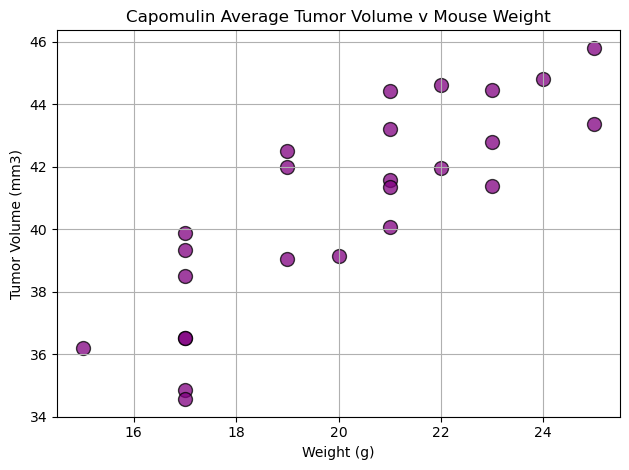

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_drug = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group data by mouse ID
capomulin_group = capomulin_drug.groupby('Mouse ID')

# Calculate average tumor volume for each mouse
avg_tumor_vol = capomulin_group['Tumor Volume (mm3)'].mean()

# Calculate average mouse weight for each mouse
avg_weight = capomulin_group['Weight (g)'].mean()

plt.scatter(avg_weight, avg_tumor_vol, marker="o", facecolors="purple", edgecolors="black",
            s=100, alpha=0.75)
plt.grid()
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Average Tumor Volume v Mouse Weight")
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


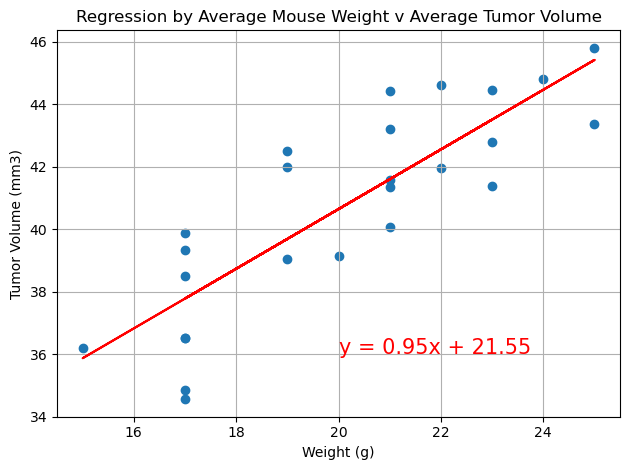

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_weight,avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tumor_vol)
#y = mx + b
regress_values = slope*avg_weight+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(avg_weight, avg_tumor_vol)
plt.plot(avg_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.grid()
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Regression by Average Mouse Weight v Average Tumor Volume")
plt.tight_layout()
plt.show()
